# **EFFICIENTNET-B0 FOR CT SCAN IMAGES**

In [ ]:
from google.colab import drive #mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/CTfull" #unzipping dataset file 

Streaming output truncated to the last 5000 lines.
  inflating: CTfull/train/normal/nCT5067.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT5067.jpg  
  inflating: CTfull/train/normal/nCT1229.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT1229.jpg  
  inflating: CTfull/train/normal/nCT5729.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT5729.jpg  
  inflating: CTfull/train/normal/nCT6234.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT6234.jpg  
  inflating: CTfull/train/normal/nCT7894.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT7894.jpg  
  inflating: CTfull/train/normal/nCT2734.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT2734.jpg  
  inflating: CTfull/train/normal/nCT6963.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT6963.jpg  
  inflating: CTfull/train/normal/nCT8782.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT8782.jpg  
  inflating: CTfull/train/normal/nCT2287.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT2287.jpg  
  in

In [ ]:
#loading libraries
import cv2
import pandas as pd
import os
import numpy as np
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
images=[]
labels=[]

In [ ]:
a="/content/CTfull/train/covid/" #path for covid positive training images

In [ ]:
#preparing training set
for item in os.listdir(a):
    c=str(a+item)
    img = cv2.imread(c) 
    

    width = 224
    height = 224
    dim = (width, height)
    try:
        resized = cv2.resize(img, dim , interpolation=cv2.INTER_AREA)

    except:
        break
        print("b")
    images.append(resized)
    labels.append("1")
    
for item in os.listdir("/content/CTfull/train/normal/"): #path for covid negative training set
    img = cv2.imread("/content/CTfull/train/normal/"+item) 
    width=224
    height=224
    dim=(width,height)
    try:
        res = cv2.resize(img, dim , interpolation=cv2.INTER_AREA)
       
    except:
        print("b")
        break
    images.append(res)
    labels.append("0")


In [ ]:
images=np.asarray(images) #converting them to array for further processing

In [ ]:
labels=np.asarray(labels)

In [ ]:
trainy=labels.astype("uint8")

In [ ]:
#creating a dataframe for shuffling in the next steps
df = pd.DataFrame(list(zip(images, labels)), 
               columns =['Image', 'Label'])

In [ ]:
#shuffling df
from sklearn.utils import shuffle
df = shuffle(df)

In [ ]:
trainx=df["Image"]

In [ ]:
trainy=df["Label"]

In [ ]:
trainx=np.asarray(trainx)

In [ ]:
traindata=[]
for i in range (len(trainx)):
    trx=trainx[i]
    traindata.append(trx) 

In [ ]:
traindata=np.asarray(traindata) #converting to array

In [ ]:
traindata.shape

(3000, 224, 224, 3)

In [ ]:
trainy=np.asarray(trainy)

In [ ]:
trainy=trainy.astype("uint8")

In [ ]:
print(trainy)

[0 1 0 ... 1 1 1]


In [ ]:
import tensorflow as tf
tf.__version__

'2.7.0-dev20210828'

In [ ]:
from tensorflow.keras.applications import EfficientNetB0 

In [ ]:
#efficientnet b0 model pr-trained on imagenet
model = EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout

In [ ]:
#defining model arch
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation="sigmoid")(x)

In [ ]:
model_final = tf.keras.Model( model.input, predictions)

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
#compiling the model
model_final.compile(optimizer = Adam(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:357: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#training the model
eff_ct_hist=model_final.fit(traindata, trainy, epochs=40, validation_split=0.1)  

Epoch 1/40
85/85 [==============================] - 196s 2s/step - loss: 0.4186 - acc: 0.9181 - val_loss: 0.0347 - val_acc: 0.9967
Epoch 2/40
85/85 [==============================] - 189s 2s/step - loss: 0.0281 - acc: 0.9922 - val_loss: 0.0259 - val_acc: 0.9967
Epoch 3/40
85/85 [==============================] - 187s 2s/step - loss: 0.0123 - acc: 0.9970 - val_loss: 0.0060 - val_acc: 0.9967
Epoch 4/40
85/85 [==============================] - 187s 2s/step - loss: 0.0114 - acc: 0.9967 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 5/40
85/85 [==============================] - 188s 2s/step - loss: 0.0060 - acc: 0.9978 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 6/40
85/85 [==============================] - 189s 2s/step - loss: 0.0076 - acc: 0.9978 - val_loss: 6.4517e-04 - val_acc: 1.0000
Epoch 7/40
85/85 [==============================] - 187s 2s/step - loss: 0.0050 - acc: 0.9985 - val_loss: 1.7789e-04 - val_acc: 1.0000
Epoch 8/40
85/85 [==============================] - 187s 2s/step - loss: 0.

In [ ]:
a="/content/CTfull/test/covid/" #path for covid positive images in test set

In [ ]:
images=[] 
labels=[]

In [ ]:
#repeating the same steps as above for test data
for item in os.listdir(a):
    c=str(a+item)
    img = cv2.imread(c) 
    

    width = 224
    height = 224
    dim = (width, height)
    try:
        resized = cv2.resize(img, dim , interpolation=cv2.INTER_AREA)
        #print("t")
    except:
        break
        print("b")

    images.append(resized)
    labels.append("1") #1 for covid positive

for item in os.listdir("/content/CTfull/test/normal/"): #path for covid negative test images
    img = cv2.imread("/content/CTfull/test/normal/"+item) 
    width=224
    height=224
    dim=(width,height)
    try:
        res = cv2.resize(img, dim , interpolation=cv2.INTER_AREA)
       
    except:
        print("b")
        break
    images.append(res)
    labels.append("0") #0 for covid negative
    

In [ ]:
images=np.asarray(images)

In [ ]:
images.shape

(1000, 224, 224, 3)

In [ ]:
labels=np.asarray(labels)

In [ ]:
labels.shape

(1000,)

In [ ]:
testy=labels.astype("uint8")

In [ ]:
#creating dataframe to shuffle the data in the next steps
dframe = pd.DataFrame(list(zip(images, labels)), 
               columns =['Image', 'Label'])

In [ ]:
from sklearn.utils import shuffle
dframe = shuffle(dframe)

In [ ]:
testx=dframe["Image"]  

In [ ]:
testy=dframe["Label"]

In [ ]:
testx=np.asarray(testx) #converting back to array for generating predictions

In [ ]:
testdata=[]
for i in range(len(testx)):
  tsx=testx[i]
  testdata.append(tsx)

In [ ]:
testdata=np.asarray(testdata)

In [ ]:
testdata.shape

(1000, 224, 224, 3)

In [ ]:
testy=np.asarray(testy)

In [ ]:
testy=testy.astype("uint8")

In [ ]:
#evaluating the model
score = model_final.evaluate(testdata, testy, verbose = 0)

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.0025612248573452234
Test accuracy: 0.9990000128746033


In [ ]:
#generating predictions
predictions = model_final.predict(testdata) 


In [ ]:
preds=[]
for i in range(len(predictions)):
  if(predictions[i]>=0.5):
    preds.append(int("1"))
  else:
    preds.append(int("0"))

In [ ]:
preds=np.array(preds)

In [ ]:
ctr=0
for i in range(len(preds)):
  if(preds[i]!=testy[i]):
    ctr=ctr+1
print(ctr)

1


In [ ]:
#performance metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

In [ ]:
precision = precision_score(testy, preds)#precision

In [ ]:
print(precision)

1.0


In [ ]:
matrix = confusion_matrix(testy, preds) #confusion matrix

In [ ]:
print(matrix)

[[500   0]
 [  1 499]]


In [ ]:
recall = recall_score(testy, preds) #recall

In [ ]:
print(recall)

0.998


In [ ]:
f1=f1_score(testy, preds) #f1-score

In [ ]:
print(f1)

0.998998998998999


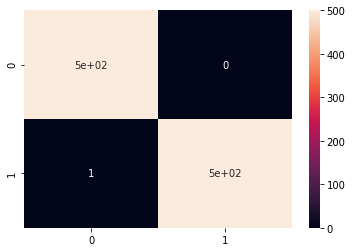

In [ ]:
import seaborn as sns
sns.heatmap(matrix, annot=True)

In [ ]:
kappa = cohen_kappa_score(testy, preds) #cohen kappa score
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.998000
